# Proyecto Dashboard
## Diplomado en Ciencia de Datos, Analitica de Datos, UdeC.
### Ignacio Loyola, Yamira Roa

#### Objetivo:
Desplegar un Dashboard que permita identificar las variables principales que influyen en una buena/mala experiencia del usuario durante un vuelo comercial.





El proyecto consiste en desarrollar un Dashboard, que integre un conjunto de visualizaciones significativo en el dominio o ámbito de un dataset a elegir. El proyecto será desarrollado en equipos de 3 integrantes. 

Los aspectos a evaluar serán los siguientes:

Objetivo de la visualización (15 puntos): debe estar explícitamente incluido en la visualización. Todos los componentes de la visualización deberán contribuir a dicho objetivo, lo que puede ser reforzado con texto explicativo. El objetivo incluirá una descripción de potenciales usuarios y contexto de uso.
Pertinencia y corrección del Dashboard (40 puntos): el Dashboard y sus componentes, junto con estar correctamente implementados, deberán responder al objetivo específico que se anuncia (ej: a continuación, mostramos la evolución en el tiempo de esta variable => lineplot, o vemos cómo se corresponde esta variable con esta otra => scatter o bubbleplot). Mínimo 5 gráficos, máximo 8 (*)
Uso de color y texto (15 puntos): en cada gráfica o visualización componente, el uso de títulos, etiquetas, textos descriptivos y colores, debe ser concordante con los objetivos descritos.
Organización y coherencia (10 puntos): las visualizaciones deben organizarse significativamente en la pantalla, y ser coherentes o complementarias entre sí. El usuario debe entender cada una de las visualizaciones y su orden de presentación.
Presentación y demostración (20 puntos): el diseño y ejecución del dashboard debe ser presentado. Se evaluarán los aspectos anteriores en una exposición de no más de 15 minutos, más las respuestas y participación en un periodo de consultas y discusión de 10 minutos. 

# Requerimientos

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Carga de la Data

In [2]:
data = pd.read_csv('Airlines Reviews and Rating.csv')

# EDA

In [3]:
data

,Aircraft Type,Users Reviews,Country,Type_of_Travellers,Route,Seat_Types,Seat Comfort,Date Flown,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money,Recommended
0,NaN,✅Trip Verified| Cancelled our flight last-min...,United Kingdom,Couple Leisure,London Heathrow to Tokyo,Economy Class,1.0,Sep-23,1.0,2.0,1.0,NaN,3.0,1,no
1,NaN,"✅Trip Verified| I had a flight from Miami, Flo...",United States,Solo Leisure,Miami to Dublin via London Heathrow,Business Class,1.0,Aug-23,3.0,1.0,2.0,1.0,1.0,1,no
2,NaN,✅Trip Verified| We started our day with BA in...,United States,Business,Prague to San Francisco via London,Business Class,1.0,Sep-23,3.0,1.0,3.0,1.0,NaN,1,no
3,NaN,✅Trip Verified| I fly British Airways weekly ...,United Kingdom,Business,London to Glasgow,Economy Class,1.0,Sep-23,1.0,1.0,1.0,1.0,1.0,1,no
4,NaN,Not Verified| Everything was ok until our con...,France,Family Leisure,San Diego to Marseille via London,Economy Class,3.0,Aug-23,2.0,1.0,3.0,1.0,3.0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,NaN,LAX to LHR - 25 Oct 2014. I agree with other r...,United Kingdom,NaN,NaN,Business Class,3.0,NaN,2.0,NaN,1.0,NaN,3.0,2,no
3286,NaN,Toronto to London Heathrow - 26/10/14. After r...,United Kingdom,NaN,NaN,Business Class,4.0,NaN,5.0,NaN,5.0,NaN,5.0,4,yes
3287,NaN,I have after years of loyalty finally had it w...,United Kingdom,NaN,NaN,Business Class,3.0,NaN,1.0,NaN,1.0,NaN,2.0,1,no
3288,NaN,Traveled with British Airways ORD-LHR last mon...,United States,NaN,NaN,Business Class,5.0,NaN,5.0,NaN,4.0,NaN,4.0,4,yes


#### Manejo de duplicados

In [4]:
data.duplicated().sum()

63

In [5]:
data = data.drop_duplicates()

In [6]:
data.duplicated().sum()

0

#### Drop columnas triviales

In [7]:
data.dtypes

Aircraft Type              object
Users Reviews              object
Country                    object
Type_of_Travellers         object
Route                      object
Seat_Types                 object
Seat Comfort              float64
Date Flown                 object
Cabin Staff Service       float64
Ground Service            float64
Food & Beverages          float64
Wifi & Connectivity       float64
Inflight Entertainment    float64
Value For Money             int64
Recommended                object
dtype: object

In [8]:
print(data.Country.unique())
print(f'\n Numero de paises: {len(data.Country.unique())}')
data.dropna(subset=['Country'], inplace=True)
print(data.Country.unique())
print(f'\n Numero de paises: {len(data.Country.unique())}')


['United Kingdom' 'United States' 'France' 'Germany' 'Switzerland'
 'South Africa' 'Canada' 'Kuwait' 'Iceland' 'Australia' 'Denmark' 'Poland'
 'Hong Kong' 'Qatar' 'Spain' 'Greece' 'Italy' 'Senegal'
 'United Arab Emirates' 'Romania' 'Cyprus' 'Chile' 'Sweden' 'Ireland'
 'Netherlands' 'Austria' 'India' 'Belgium' 'New Zealand' 'Czech Republic'
 'Malaysia' 'Singapore' 'Ghana' 'Bermuda' 'Botswana' 'Brazil' 'Panama'
 'Nigeria' 'Russian Federation' 'Philippines' 'Bulgaria' 'Thailand'
 'Argentina' 'Mexico' 'Saint Kitts and Nevis' 'Vietnam' 'Norway' 'Jordan'
 'Japan' 'Taiwan' 'China' 'Slovakia' 'Israel' 'South Korea' 'Saudi Arabia'
 'Hungary' 'Portugal' 'Cayman Islands' 'Costa Rica' 'Egypt' 'Laos'
 'Turkey' 'Indonesia' 'Bahrain' 'Dominican Republic' 'Luxembourg'
 'Finland' 'Ukraine' nan]

 Numero de paises: 69
['United Kingdom' 'United States' 'France' 'Germany' 'Switzerland'
 'South Africa' 'Canada' 'Kuwait' 'Iceland' 'Australia' 'Denmark' 'Poland'
 'Hong Kong' 'Qatar' 'Spain' 'Greece' 'Italy' 

/var/folders/lr/gg3jpj7s6vqft81dzw0pfgz00000gn/T/ipykernel_1764/956113566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Country'], inplace=True)


In [9]:
data.Seat_Types.unique()

array(['Economy Class', 'Business Class', 'Premium Economy',
       'First Class', nan], dtype=object)

In [10]:
data.describe()

,Seat Comfort,Cabin Staff Service,Ground Service,Food & Beverages,Wifi & Connectivity,Inflight Entertainment,Value For Money
count,3112.000000,3101.000000,2810.000000,2847.000000,592.000000,2107.000000,3226.000000
mean,2.827442,3.221864,2.795374,2.668423,1.923986,2.653536,2.623683
std,1.359318,1.486863,1.455809,1.437989,1.355305,1.392062,1.457953
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000
75%,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### Encoding

Hacemos un mapeo donde:

Seat_Types [Economy Class', 'Business Class', 'Premium Economy',
       'First Class', nan] = [1, 0, 3, 2, 4]

Recomended [no, yes] = [0, 1]

In [11]:
df_encoded = data.drop(["Aircraft Type" , "Date Flown" , "Country" , "Type_of_Travellers" , "Route"] , axis = 1)
le = LabelEncoder()

In [12]:
for col in df_encoded.columns:
    if col == "Users Reviews":
        pass
    else:
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Graficos

### Requerimientos

In [13]:
import plotly_express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## Explorar recomendaciones vs no recomendaciones

In [14]:
count_Recommended = df_encoded['Recommended'].value_counts()
count_Recommended

Recommended
0    1988
1    1238
Name: count, dtype: int64

In [15]:
count_Recommended.values

array([1988, 1238])

In [16]:
pie_chart = px.pie(count_Recommended, values='count', title='Recommendation Distribution', names={0: 'Not Recommended', 1: 'Recommended'})
pie_chart.show()

## Mapa de palabras de recomendaciones vd no recomendaciones

In [17]:
data['Users Reviews'][0]

'✅Trip Verified|  Cancelled our flight last-minute then moved us onto a flight 2 days later operated by Japan Airlines. We had paid a lot extra for extra legroom seats as I am very tall and they assigned me a middle seat deep in the middle of the plane. Because it was operated by a different airline but booked by BA, neither BA nor the other airline could change my seat over the phone despite seats being available. After 4 hours of waiting in queues and sitting on hold their solution was for me to arrive early at the airport. I did but the seats had already been given away for free by people who had booked directly with that airline and could check in online. I got a £10 meal voucher as compensation for this enormous downgrade on a 14 hour flight. Never again will I fly BA. I would rather fly indirect with better airlines than use this disgrace of an airline again.'

In [18]:
positive_reviews_txt = data[data['Users Reviews'] == 1]
negative_reviews_txt = data[data['Users Reviews'] == 0]

In [19]:
positive_reviews = ' '.join(data["Users Reviews"])
negative_reviews = ' '.join(data["Users Reviews"])

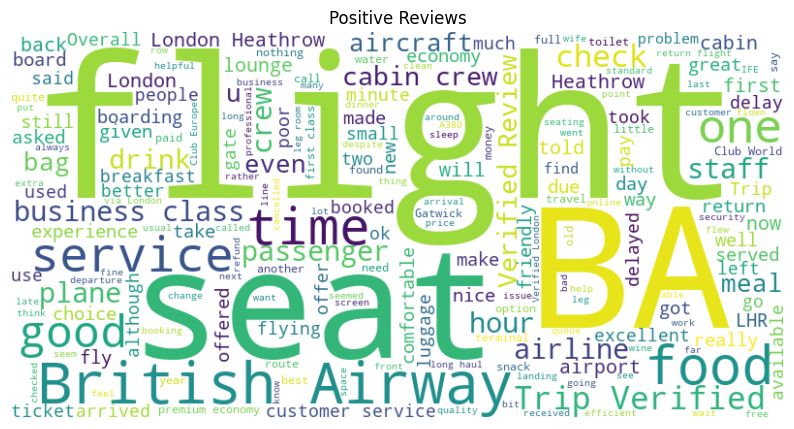

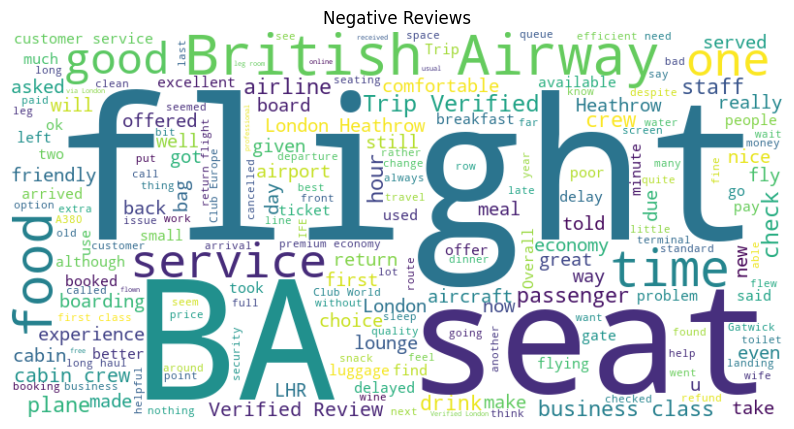

In [20]:
wordcloud_yes = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_yes, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews")
plt.show()

wordcloud_no = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_no, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews")
plt.show()

## Mapa Coropletico

In [21]:
import folium

In [22]:
# Agrupamos por país y por recomendacion
counts_by_country = data.groupby(['Country', 'Recommended']).size().reset_index(name='Event Count')
counts_by_country['Recommended'] = counts_by_country['Recommended'].map({'yes': 1, 'no': 0})
replacements = {
    'United States': 'United States of America',
    'Russian Federation' : 'Russia'
}
counts_by_country['Country'] = counts_by_country['Country'].replace(replacements)
counts_by_country.set_index('Country', inplace=True)
counts_by_country

,Recommended,Event Count
Country,,
Argentina,0,3
Argentina,1,2
Australia,0,81
Australia,1,44
Austria,0,2
...,...,...
United Kingdom,0,1220
United Kingdom,1,789
United States of America,0,263


In [23]:
df_yes = counts_by_country[counts_by_country['Recommended'] == 1]
df_no = counts_by_country[counts_by_country['Recommended'] == 0]

In [24]:
df_yes.describe()

,Recommended,Event Count
count,56.0,56.000000
mean,1.0,22.107143
std,0.0,105.468596
min,1.0,1.000000
25%,1.0,1.750000
50%,1.0,3.500000
75%,1.0,9.000000
max,1.0,789.000000


In [25]:
threshold_scale = [0, 5, 10, 100, 200, 300, 400, 500, 600, 700, 1000, 1500, 2000]

In [26]:
mapa_yes = folium.Map(location=[0, 0], zoom_start=2, tiles='openstreetmap')
mapa_no = folium.Map(location=[0, 0], zoom_start=2, tiles='openstreetmap')

folium.Choropleth( # llamamos a la función Choroplet de Folium
    geo_data='countries.geo.json',  # pasamos la forma de los estados al argumento geo_data
    name='choropleth', # damos un nombre al mapa
    data=df_yes, # pasamos los datos del dataset al argumento data
    columns=[df_yes.index, 'Event Count'], # de los que seleccionamos las columnas del área geográfica y la magnitud a colorear
    key_on='feature.properties.name', # identificamos la columna índice o clave
    threshold_scale=threshold_scale,
    fill_color='YlGn', # elegimos paleta de colores del mapa
    fill_opacity=0.7, # opacidad de relleno
    line_opacity=0.2, # opacidad de contornos
    legend_name='Numero de Recomendaciones' # leyenda de la barra de leyenda
).add_to(mapa_yes) # añadimos esta descripción al mapa

# Agregar mapas coropléticos para Recommended = No
folium.Choropleth(
    geo_data='countries.geo.json',
    data=df_no,
    columns=[df_no.index, 'Event Count'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Event Count for Recommended = No'
).add_to(mapa_no)

In [27]:
mapa_yes

In [28]:
mapa_no

In [29]:
df_yes_10 = df_yes.sort_values(by='Event Count', ascending=False).head(10)
df_no_10 = df_no.sort_values(by='Event Count', ascending=False).head(10)

In [30]:
bar_top10_yes = px.bar(df_yes_10, x=df_yes_10.index, y='Event Count', 
                 labels={'x': 'País', 'Event Count': 'Cantidad de Eventos'},
                 title='Top 10 Países con Recommended = Yes',
                 )

bar_top10_no = px.bar(df_no_10, x=df_no_10.index, y='Event Count', 
                 labels={'x': 'País', 'Event Count': 'Cantidad de Eventos'},
                 title='Top 10 Países con Recommended = No',
                 )

In [31]:
bar_top10_yes.show()

In [32]:
bar_top10_no.show()

## Stack Bar chart

In [33]:
df = df_encoded.drop(columns='Users Reviews').copy()
mapeo = {0:'Business Class', 1:'Economy Class', 2:'First Class', 3:'Premium Economy'}
mapeo_recommended = {0:'NO', 1:'YES'}
df['Seat_Types'] = df['Seat_Types'].map(mapeo)
df['Recommended'] = df['Recommended'].map(mapeo_recommended)
df.set_index('Seat_Types', inplace=True)

In [34]:
count_data = df.groupby(['Seat_Types', 'Ground Service']).size().unstack()

# Crear el gráfico de barras apiladas
fig_ground_services = px.bar(count_data, x=count_data.index, y=count_data.columns[1:], barmode='stack')

fig_ground_services.update_layout(
    title='Ground Services based on Seat Types',
    xaxis_title='Seat Types',
    yaxis_title='Count',
    legend_title='Ground Service',
)

# Mostrar el gráfico
fig_ground_services.show()

In [35]:
count_data = df.groupby(['Seat_Types', 'Wifi & Connectivity']).size().unstack()

# Crear el gráfico de barras apiladas
fig_wifi = px.bar(count_data, x=count_data.index, y=count_data.columns[1:], barmode='stack')

fig_wifi.update_layout(
    title='Wifi Valoration based on Seat Types',
    xaxis_title='Seat Types',
    yaxis_title='Count',
    legend_title='Wifi Valoration',
)

# Mostrar el gráfico
fig_wifi.show()

In [36]:
count_data = df.groupby(['Recommended', 'Seat_Types']).size().unstack()
count_data

Seat_Types,Business Class,Economy Class,First Class,Premium Economy
Recommended,,,,
NO,574,1116,100,196
YES,445,586,89,118


In [37]:
count_data = df.groupby(['Recommended', 'Seat_Types']).size().unstack()

# Crear el gráfico de barras apiladas
fig_recomended_Seat_Types = px.bar(count_data, x=count_data.index, y=count_data.columns[0:], barmode='stack')

fig_recomended_Seat_Types.update_layout(
    title='Recomended/or not based on Seat Types',
    xaxis_title='Recommended',
    yaxis_title='Count',
    legend_title='Seat Type',
)

# Mostrar el gráfico
fig_recomended_Seat_Types.show()

In [38]:
count_data = df.groupby(['Recommended', 'Seat Comfort']).size().unstack()

# Crear el gráfico de barras apiladas
fig_recomended_Seat_Comfort = px.bar(count_data, x=count_data.index, y=count_data.columns[0:], barmode='stack')

fig_recomended_Seat_Comfort.update_layout(
    title='Recomended/or not based on Seat Comfort',
    xaxis_title='Recommended',
    yaxis_title='Count',
    legend_title='Valorization',
)

# Mostrar el gráfico
fig_recomended_Seat_Comfort.show()

In [39]:
count_data = df.groupby(['Recommended', 'Cabin Staff Service']).size().unstack()

# Crear el gráfico de barras apiladas
fig_recomended_cabin_service = px.bar(count_data, x=count_data.index, y=count_data.columns[0:], barmode='stack')

fig_recomended_cabin_service.update_layout(
    title='Recomended/or not based on Cabin Staff Service',
    xaxis_title='Recommended',
    yaxis_title='Count',
    legend_title='Valorization',
)

# Mostrar el gráfico
fig_recomended_cabin_service.show()

In [40]:
count_data = df.groupby(['Recommended', 'Ground Service']).size().unstack()

# Crear el gráfico de barras apiladas
fig_recomended_Ground_Service = px.bar(count_data, x=count_data.index, y=count_data.columns[0:], barmode='stack')

fig_recomended_Ground_Service.update_layout(
    title='Recomended/or not based on Ground Service',
    xaxis_title='Recommended',
    yaxis_title='Count',
    legend_title='Valorization',
)

# Mostrar el gráfico
fig_recomended_Ground_Service.show()

In [41]:
count_data = df.groupby(['Recommended', 'Food & Beverages']).size().unstack()

# Crear el gráfico de barras apiladas
fig_recomended_Food = px.bar(count_data, x=count_data.index, y=count_data.columns[0:], barmode='stack')

fig_recomended_Food.update_layout(
    title='Recomended/or not based on Food & Beverages',
    xaxis_title='Recommended',
    yaxis_title='Count',
    legend_title='Valorization',
)

# Mostrar el gráfico
fig_recomended_Food.show()

In [42]:
count_data = df.groupby(['Recommended', 'Wifi & Connectivity']).size().unstack()

# Crear el gráfico de barras apiladas
fig_recomended_Wifi = px.bar(count_data, x=count_data.index, y=count_data.columns[0:], barmode='stack')

fig_recomended_Wifi.update_layout(
    title='Recomended/or not based on Wifi & Connectivity',
    xaxis_title='Recommended',
    yaxis_title='Count',
    legend_title='Valorization',
)

# Mostrar el gráfico
fig_recomended_Wifi.show()

In [43]:
count_data = df.groupby(['Recommended', 'Inflight Entertainment']).size().unstack()

# Crear el gráfico de barras apiladas
fig_recomended_Entertainment = px.bar(count_data, x=count_data.index, y=count_data.columns[0:], barmode='stack')

fig_recomended_Entertainment.update_layout(
    title='Recomended/or not based on Inflight Entertainment',
    xaxis_title='Recommended',
    yaxis_title='Count',
    legend_title='Valorization',
)

# Mostrar el gráfico
fig_recomended_Entertainment.show()

In [44]:
count_data = df.groupby(['Recommended', 'Value For Money']).size().unstack()

# Crear el gráfico de barras apiladas
fig_recomended_Money = px.bar(count_data, x=count_data.index, y=count_data.columns[0:], barmode='stack')

fig_recomended_Money.update_layout(
    title='Recomended/or not based on Value For Money',
    xaxis_title='Recommended',
    yaxis_title='Count',
    legend_title='Valorization',
)

# Mostrar el gráfico
fig_recomended_Money.show()

# Dashboard

### Requerimientos

In [45]:
from dash import Dash, html, dcc, Output, Input
import plotly.express as px
import dash_bootstrap_components as dbc

### Despliegue

In [46]:
# Figuras a desplegar
# RadioItems con pie_chart fijo on top y wordcloud_yes, mapa_yes y bar_top10_yes en un Item y wordcloud_no, mapa_no y bar_top10_no en otro
# Análisis por "Seat Type": fig_ground_services y fig_wifi
# Análisis por "Recommended": fig_recomended_Seat_Types, fig_recomended_Seat_Comfort, fig_recomended_cabin_service, fig_recomended_Ground_Service,
# fig_recomended_Food, fig_recomended_Wifi, fig_recomended_Entertainment, fig_recomended_Money. (Pensaba en un Dropdown)


In [47]:
app = Dash(__name__, external_stylesheets=[dbc.themes.VAPOR])
mytitle = dcc.Markdown(children='# Proyecto Dashboard', style={'color':'white', 'text-align':'center', 'padding-top':'40px'})
mygraph = dcc.Graph(figure={})